In [1]:
import os
os.chdir("C:/Users/joseh/OneDrive - Universidad de los Andes\MIAD\Proyecto de grado/ElectroDunas")
import Funciones_Procesamiento as fp
import Funciones_Cluster as fc

In [2]:
# Ruta de la carpeta que contiene los archivos CSV
carpeta = './Datos Electro Dunas'

dataframes = fp.leer_archivos(carpeta)

In [3]:
dataframes = fp.preprocesar_dataframes(dataframes)

Todas las DataFrames tienen las mismas columnas.
Todas las observaciones en la columna de fechas tienen el mismo formato.
No se encontraron datos faltantes.


In [4]:
# Ruta del archivo CSV con las clasificaciones de sector económico
ruta_archivo_sector = './Datos Electro Dunas/sector_economico_clientes.xlsx'

dataframes = fp.agregar_sector(dataframes, ruta_archivo_sector)

In [6]:
dataframes = fp.agregar_col_fecha_lista(dataframes)

In [7]:
dataframes = fp.agregar_factor_potencia_lista(dataframes)
dataframes = fp.agregar_desequilibrio_voltaje_lista(dataframes)

In [8]:
#Unimos todos los dataframes
df_consolidada = fp.unir_dataframes(dataframes)

In [9]:
#Identificamos como outliers como anomalias (por sector)
df_consolidada_sin_outliers= fp.identificar_outliers(df_consolidada)

In [12]:
#Clusterizamos valores que no son anomalias (por cliente)
df_consolidada_final = fc.clusterizacion_basado_distancias(df_consolidada_sin_outliers)

In [13]:
import importlib
importlib.reload(fc)

#Guardamos la dataframe en un archivo .csv
fc.guardar_como_csv(df_consolidada_final, 'df_consolidada_final.csv')

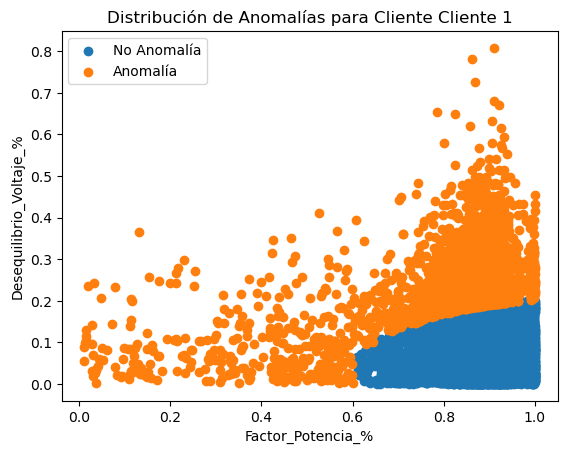

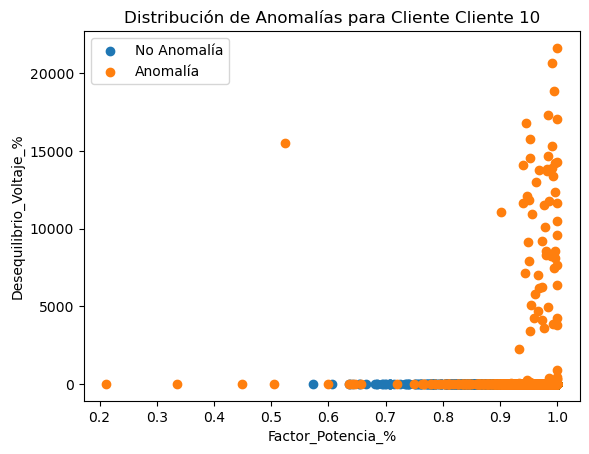

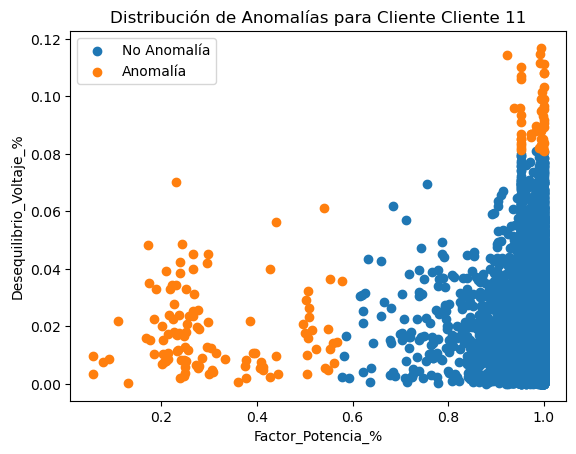

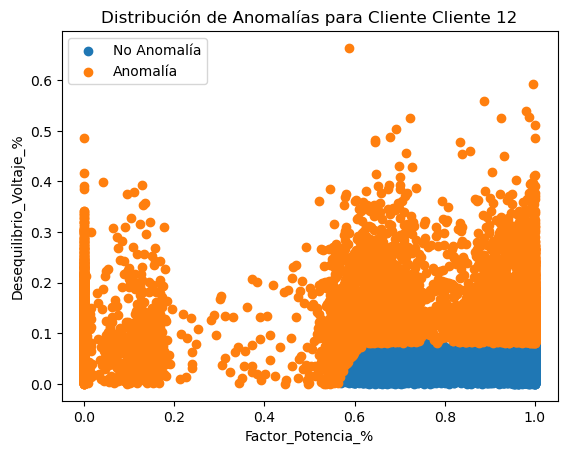

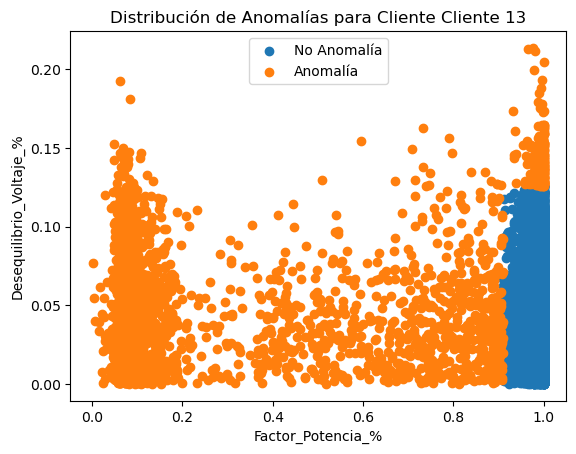

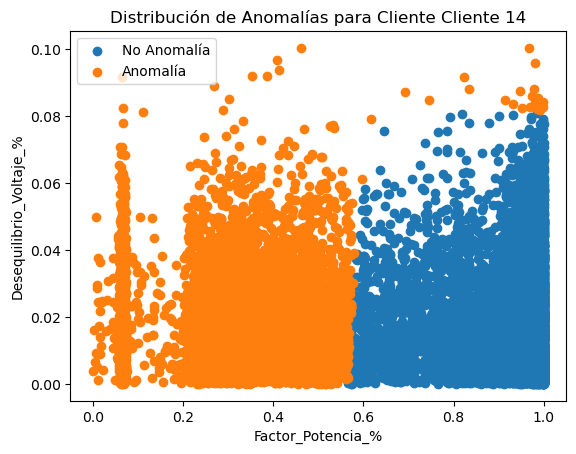

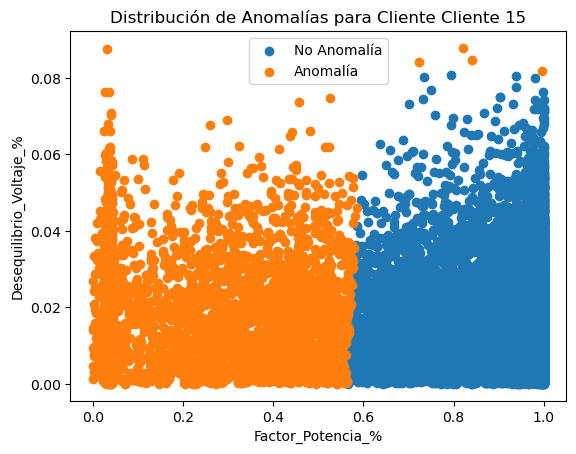

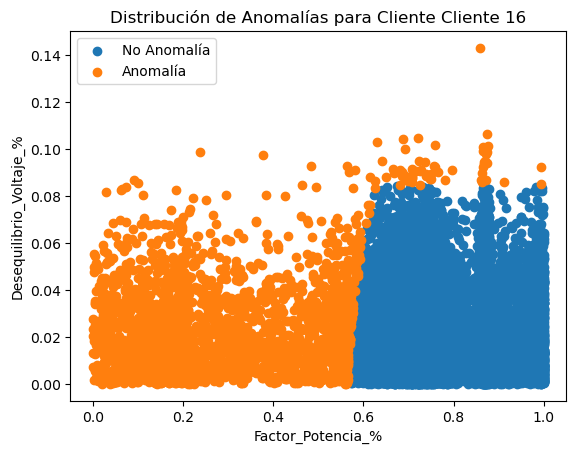

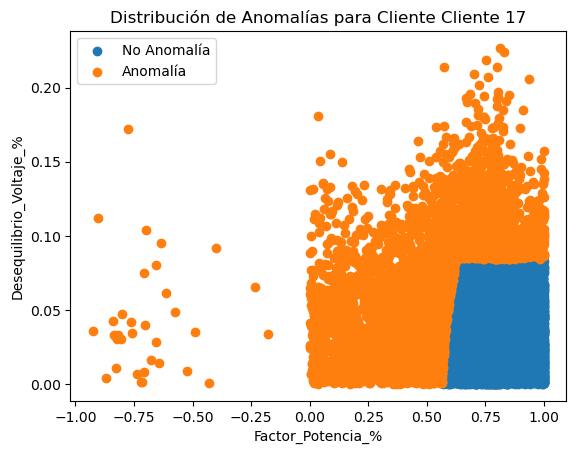

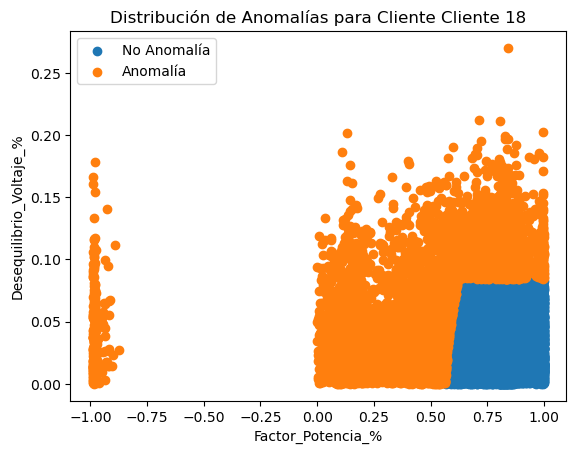

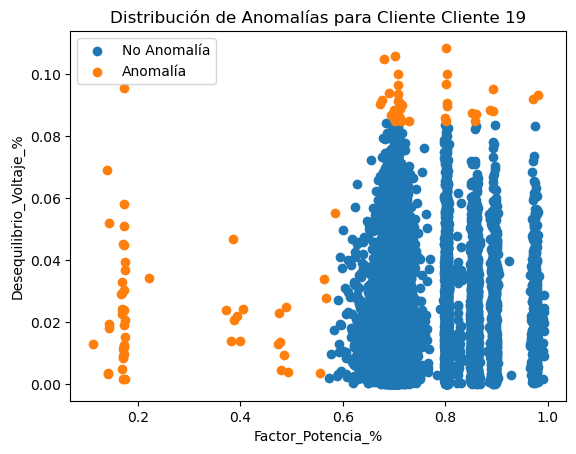

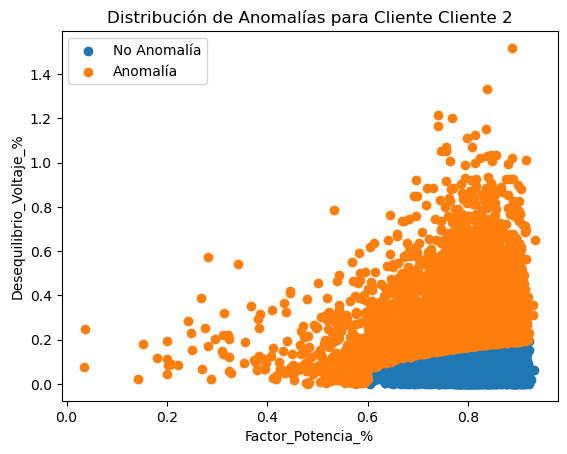

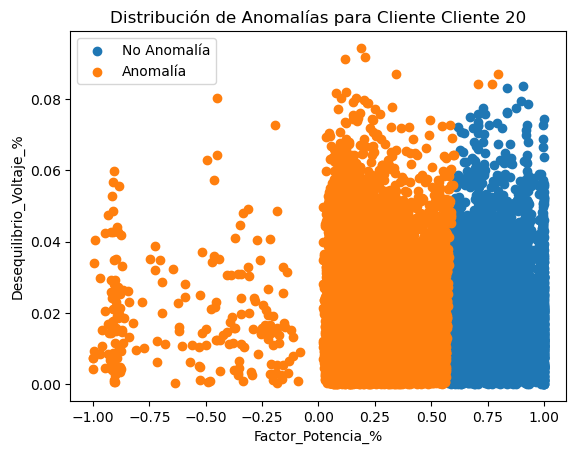

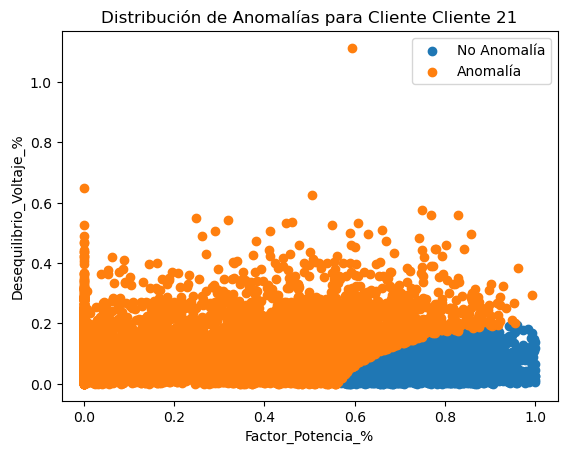

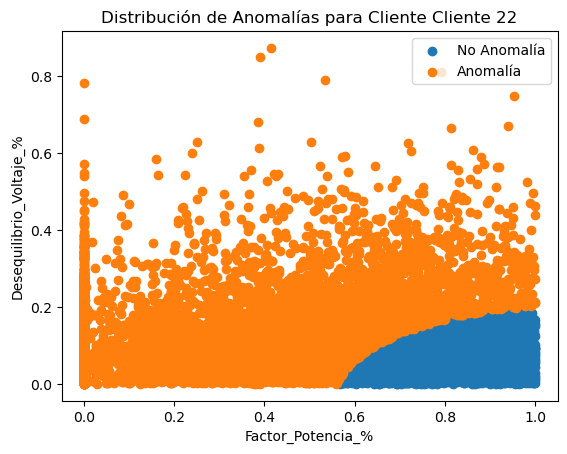

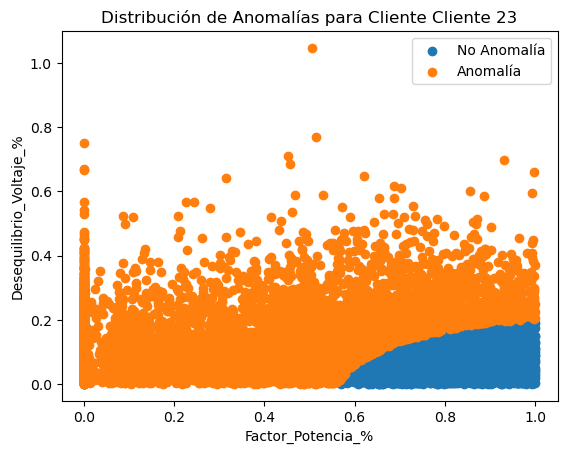

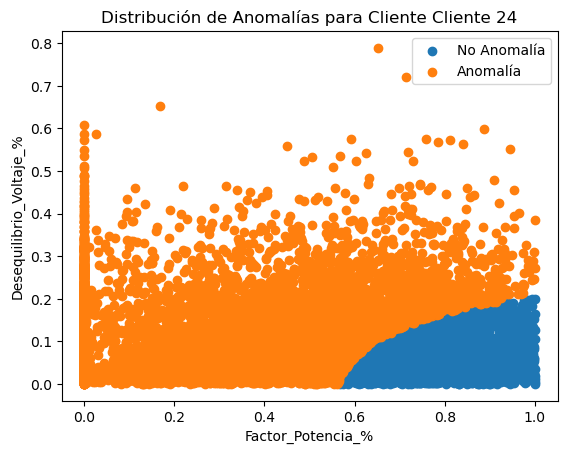

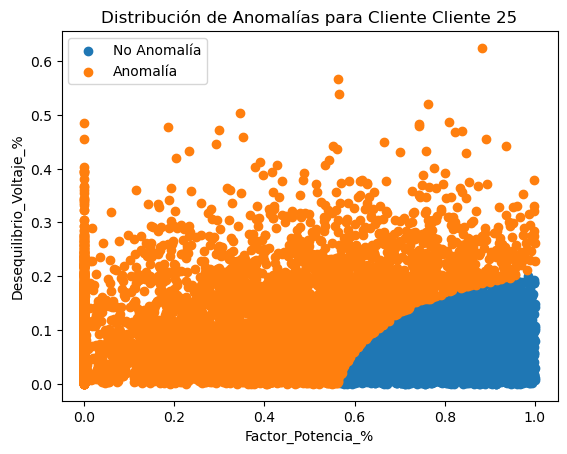

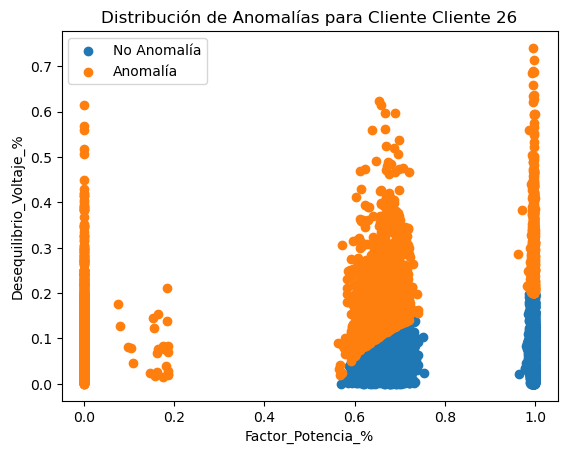

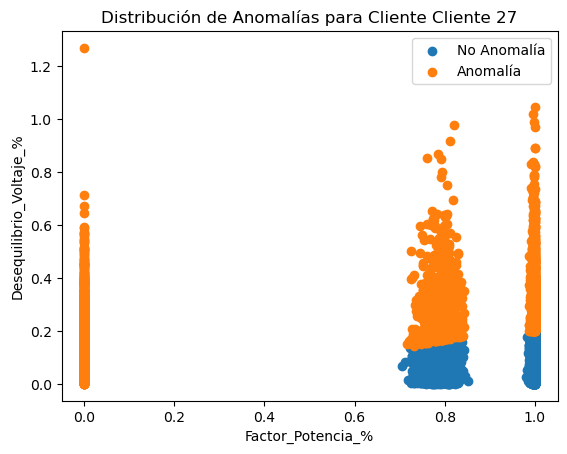

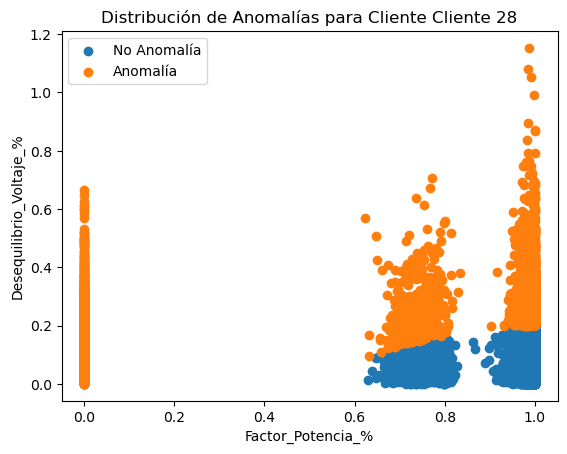

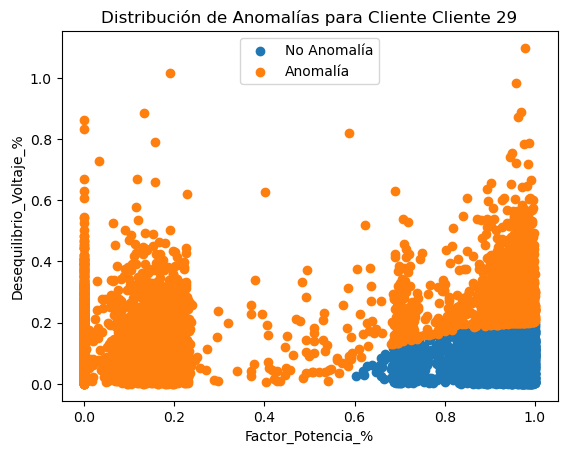

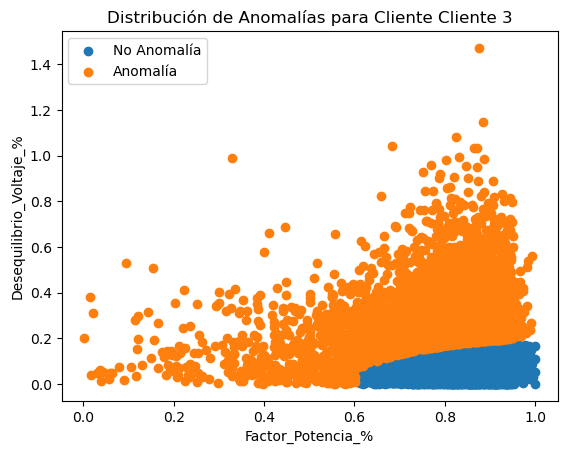

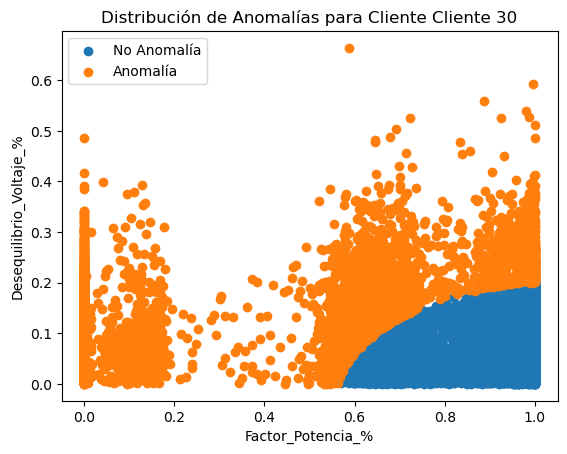

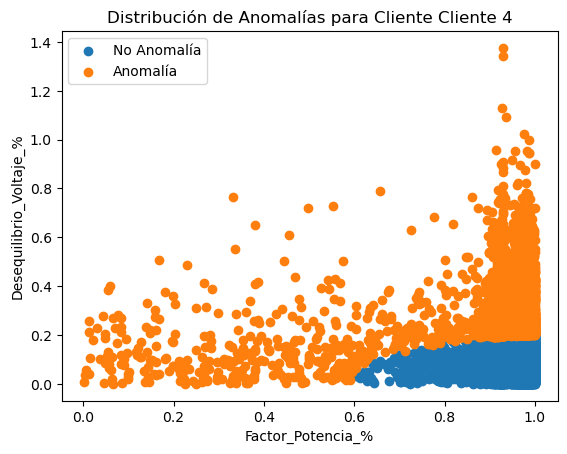

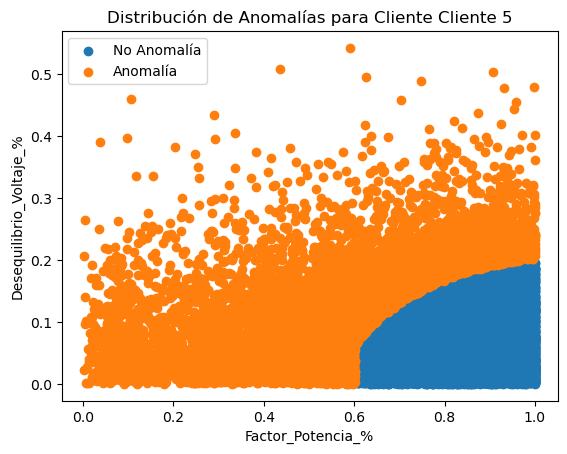

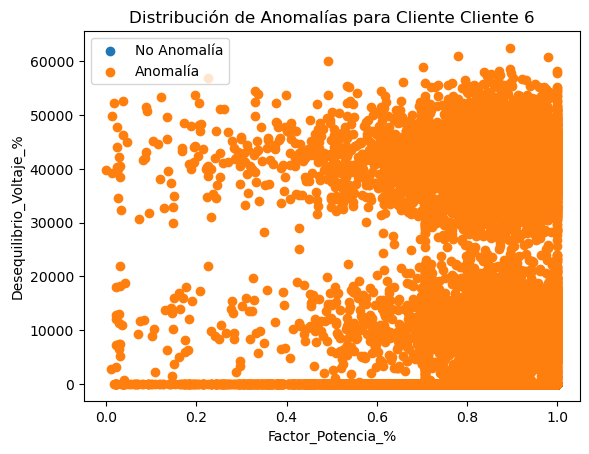

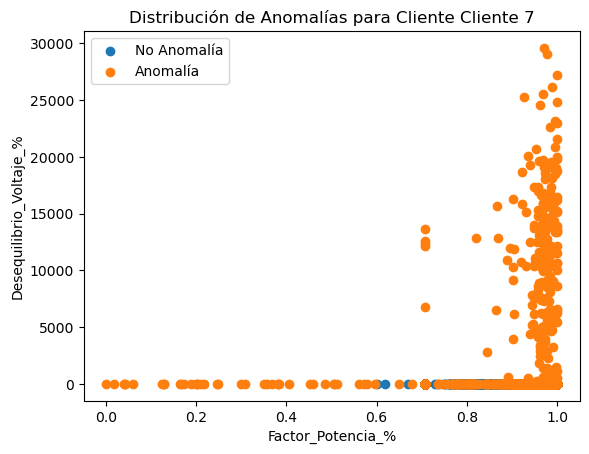

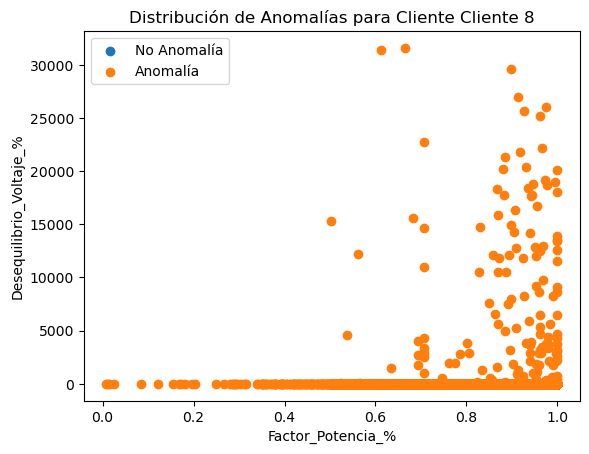

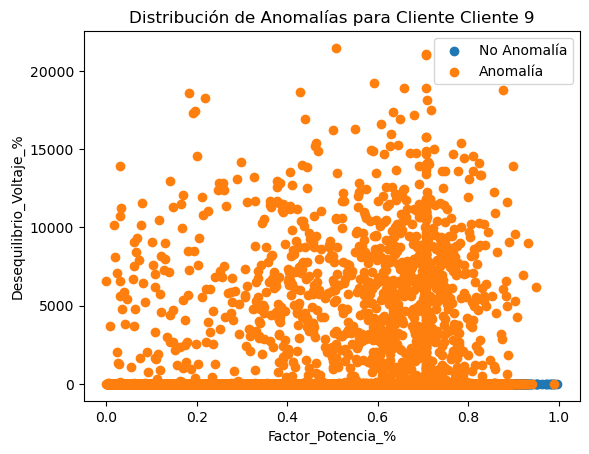

In [14]:
fc.visualizar_anomalias(df_consolidada_final, 'Cliente')

In [ ]:
fc.visualizar_anomalias(df, 'Sector')